In [7]:
'''importing module'''
import numpy as np 
import pandas as pd 
import matplotlib                  
import matplotlib.pyplot as plt
import seaborn as sns              
plt.style.use('fivethirtyeight')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('data/Original Data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/Original Data/Measurement_info.csv
data/Original Data/Measurement_item_info.csv
data/Original Data/Measurement_station_info.csv


In [17]:
summary_data = pd.read_csv('data/Measurement_summary.csv')

In [18]:
summary_data

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


In [19]:
# Import and preparing data

summary_data.drop(['Address', 'Latitude', 'Longitude'], axis=1, inplace=True) # 주소, 위도, 경도 drop
summary_data['Measurement date'] = pd.to_datetime(summary_data['Measurement date']) # date time 형 변환
negative_data = summary_data[(summary_data.SO2 < 0) | (summary_data.NO2 < 0) | (summary_data.O3 < 0) | (summary_data.CO < 0) | (summary_data.PM10 < 0) | (summary_data['PM2.5'] < 0)]# 0미만의 데이터 드랍
summary_data.drop(negative_data.index, axis=0, inplace=True)

summary_data = summary_data[summary_data['Station code'] == 101] # 101인 데이터만 남기기
summary_data.drop('Station code', axis=1, inplace=True)
summary_data.reset_index(drop=True, inplace=True)
summary_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Measurement date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00:00,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00:00,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00:00,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00:00,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00:00,0.003,0.051,0.002,1.2,69.0,61.0


In [20]:
data = summary_data[['Measurement date', 'PM2.5']].copy()
data.head()

,Measurement date,PM2.5
0,2017-01-01 00:00:00,57.0
1,2017-01-01 01:00:00,59.0
2,2017-01-01 02:00:00,59.0
3,2017-01-01 03:00:00,58.0
4,2017-01-01 04:00:00,61.0


In [21]:
import datetime as dt
# data['Measurement date']=pd.to_numeric(data['Measurement date']) / 100000000000
data['Measurement date']=range(len(data)) #???
data

,Measurement date,PM2.5
0,0,57.0
1,1,59.0
2,2,59.0
3,3,58.0
4,4,61.0
...,...,...
25857,25857,19.0
25858,25858,19.0
25859,25859,18.0
25860,25860,19.0


In [23]:
split_point = round(len(data)*0.8)
train_data = data[:split_point].copy()
train_data

,Measurement date,PM2.5
0,0,57.0
1,1,59.0
2,2,59.0
3,3,58.0
4,4,61.0
...,...,...
20685,20685,17.0
20686,20686,19.0
20687,20687,18.0
20688,20688,19.0


In [24]:
test_data = data[split_point:].copy()
test_data

,Measurement date,PM2.5
20690,20690,17.0
20691,20691,17.0
20692,20692,19.0
20693,20693,19.0
20694,20694,21.0
...,...,...
25857,25857,19.0
25858,25858,19.0
25859,25859,18.0
25860,25860,19.0


In [25]:
X_train = train_data['Measurement date']
y_train = train_data['PM2.5']

In [26]:
a = (y_train < 57)
a 

0        False
1        False
2        False
3        False
4        False
         ...  
20685     True
20686     True
20687     True
20688     True
20689     True
Name: PM2.5, Length: 20690, dtype: bool

In [27]:
X_test = test_data['Measurement date']
y_test = test_data['PM2.5']

In [28]:
from sklearn.preprocessing import PolynomialFeatures # 다항회귀
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [29]:
poly = PolynomialFeatures(7, include_bias=False)
poly.fit_transform(X_train[:, None])

<ipython-input-29-fcbbaa05c3ac>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly.fit_transform(X_train[:, None])


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 8.00000000e+00, ...,
        3.20000000e+01, 6.40000000e+01, 1.28000000e+02],
       ...,
       [2.06870000e+04, 4.27951969e+08, 8.85304238e+12, ...,
        3.78867692e+21, 7.83763594e+25, 1.62137175e+30],
       [2.06880000e+04, 4.27993344e+08, 8.85432630e+12, ...,
        3.78959272e+21, 7.83990942e+25, 1.62192046e+30],
       [2.06890000e+04, 4.28034721e+08, 8.85561034e+12, ...,
        3.79050870e+21, 7.84218345e+25, 1.62246933e+30]])

In [56]:
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [57]:
# np.newaxis == numpy array의 차원을 늘려줌
# 1D 는 2D가 되고 2D는 3D가 되고 3D는 4D ..

poly_model.fit(X_train[:, np.newaxis], y_train)

<ipython-input-57-d8b51ea28f51>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model.fit(X_train[:, np.newaxis], y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [58]:
y_predict = poly_model.predict(X_test[:, np.newaxis])

<ipython-input-58-bdc874560f72>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_predict = poly_model.predict(X_test[:, np.newaxis])


In [59]:
y_predict

array([28.11783283, 28.11877203, 28.11971116, ..., 31.33392785,
       31.33410485, 31.33428163])

In [60]:
test_data['predict'] = y_predict
test_data

,Measurement date,PM2.5,predict
20690,20690,17.0,28.117833
20691,20691,17.0,28.118772
20692,20692,19.0,28.119711
20693,20693,19.0,28.120650
20694,20694,21.0,28.121589
...,...,...,...
25857,25857,19.0,31.333573
25858,25858,19.0,31.333751
25859,25859,18.0,31.333928
25860,25860,19.0,31.334105


<AxesSubplot:xlabel='Measurement date', ylabel='PM2.5'>

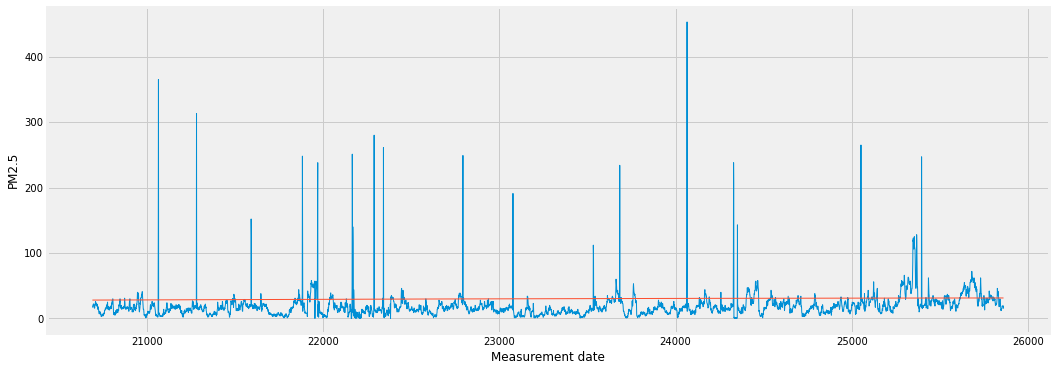

In [61]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='Measurement date', y='PM2.5', data=test_data, linewidth=1)
sns.lineplot(x='Measurement date', y='predict', data=test_data, linewidth=1)
# plt.ylim((20, 25))

In [62]:
np.sqrt(np.sum((test_data['predict'] - test_data['PM2.5'])**2)/len(test_data))

22.303982005132656